# K Nearest Neighbor

We will use the KNN machine learning method on this dataset to predict the region using the countries happiness score and other characteristics.

## 1. Import Packages

In [71]:
import pandas as pd
import numpy as np

## 2. Read in the Dataset

The dataset can be found in my GitHub repository or by following this link:
https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

In [72]:
df = pd.read_csv('C:/Users/kjtre/OneDrive/Documents/Loyola/BSAD 699/Article/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


This data set includes 20 variables, many of which will not be used in our model.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## 3. Training the Model

### 3.1 Selecting which Features to Keep or Drop

To get a full description of the data please visit the Kaggle link posted above. For this example we will keep our target variable, Regional indicator, and a number of other variables wich describe the characteristics of the country.

In [74]:
df = df.drop(columns=df.columns[12:])
df = df.drop(columns=['Country name', 'upperwhisker', 'lowerwhisker', 'Standard error of ladder score'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regional indicator            149 non-null    object 
 1   Ladder score                  149 non-null    float64
 2   Logged GDP per capita         149 non-null    float64
 3   Social support                149 non-null    float64
 4   Healthy life expectancy       149 non-null    float64
 5   Freedom to make life choices  149 non-null    float64
 6   Generosity                    149 non-null    float64
 7   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.4+ KB


In [76]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [77]:
print(df.columns)

Index(['Regional indicator', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


Defining the target and feature variables

In [78]:
model_features = df.columns.drop('Regional indicator')
model_target = 'Regional indicator'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Model target:  Regional indicator


### 3.2 Performing Exploratory Data Analysis

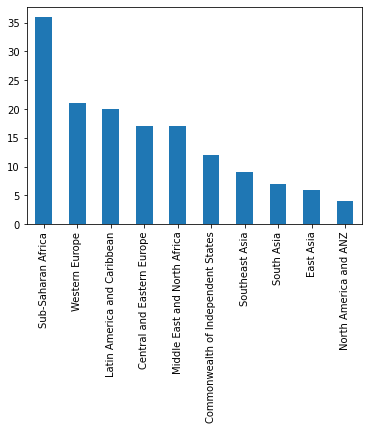

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

#Helps us determine if we are dealing with imbalanced datasets and if down or up-sampling will be required. 

Ladder score


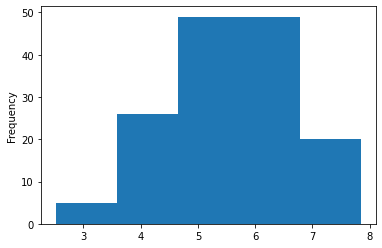

Logged GDP per capita


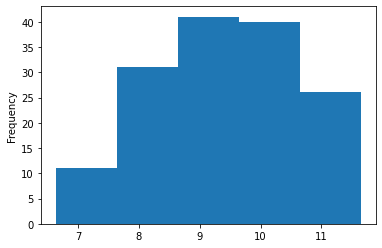

Social support


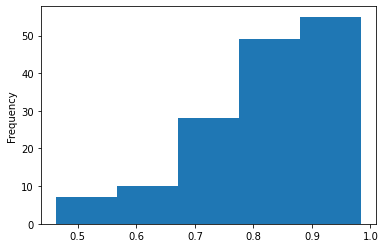

Healthy life expectancy


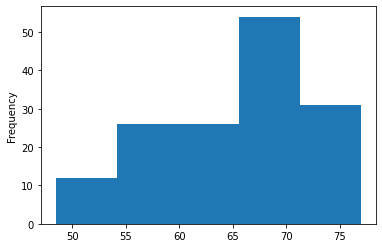

Freedom to make life choices


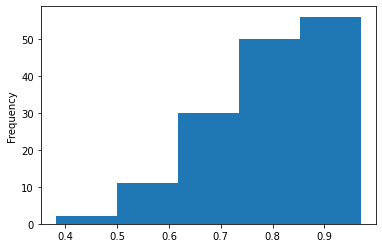

Generosity


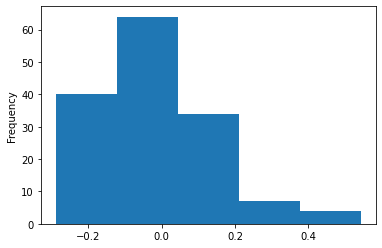

Perceptions of corruption


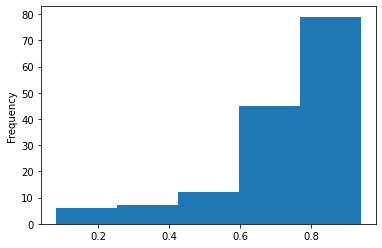

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in model_features:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()
    
# It is good practice to view the distribution of your variables.

In [81]:
for c in model_features:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())
    
# This bit helps check for outliers in the dataset.
# Based of the histograms and result of this code our data looks good.

Ladder score
min: 2.523 max: 7.842
Logged GDP per capita
min: 6.635 max: 11.647
Social support
min: 0.463 max: 0.983
Healthy life expectancy
min: 48.478 max: 76.953
Freedom to make life choices
min: 0.382 max: 0.97
Generosity
min: -0.288 max: 0.542
Perceptions of corruption
min: 0.082 max: 0.939


In [82]:
print(df[model_features].isna().sum())
# Check for missing values

Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


### 3.3 Upsampling the Data

In [83]:
print('Data set shape:', df.shape)

print('Class 1 samples in the data set:', sum(df[model_target] == 'Western Europe'))
print('Class 2 samples in the data set:', sum(df[model_target] == 'North America and ANZ'))
print('Class 3 samples in the data set:', sum(df[model_target] == 'Middle East and North Africa'))
print('Class 4 samples in the data set:', sum(df[model_target] == 'Latin America and Caribbean'))
print('Class 5 samples in the data set:', sum(df[model_target] == 'Central and Eastern Europe'))
print('Class 6 samples in the data set:', sum(df[model_target] == 'East Asia'))
print('Class 7 samples in the data set:', sum(df[model_target] == 'Southeast Asia'))
print('Class 8 samples in the data set:', sum(df[model_target] == 'Commonwealth of Independent States'))
print('Class 9 samples in the data set:', sum(df[model_target] == 'Sub-Saharan Africa'))
print('Class 10 samples in the data set:', sum(df[model_target] == 'South Asia'))


Data set shape: (149, 8)
Class 1 samples in the data set: 21
Class 2 samples in the data set: 4
Class 3 samples in the data set: 17
Class 4 samples in the data set: 20
Class 5 samples in the data set: 17
Class 6 samples in the data set: 6
Class 7 samples in the data set: 9
Class 8 samples in the data set: 12
Class 9 samples in the data set: 36
Class 10 samples in the data set: 7


There is a large imbalance between the number of observations in our target categories. Because we have a limited amount of data we will upsample so there are 36 observations for each target category.

In [84]:
from sklearn.utils import shuffle

In [85]:
class_1_no = df[df[model_target] == 'Western Europe']
class_2_no = df[df[model_target] == 'North America and ANZ']
class_3_no = df[df[model_target] == 'Middle East and North Africa']
class_4_no = df[df[model_target] == 'Latin America and Caribbean']
class_5_no = df[df[model_target] == 'Central and Eastern Europe']
class_6_no = df[df[model_target] == 'East Asia']
class_7_no = df[df[model_target] == 'Southeast Asia']
class_8_no = df[df[model_target] == 'Commonwealth of Independent States']
class_9_no = df[df[model_target] == 'Sub-Saharan Africa']
class_10_no = df[df[model_target] == 'South Asia']

upsampled_class_1_no = class_1_no.sample(n=len(class_9_no), replace=True)
upsampled_class_2_no = class_2_no.sample(n=len(class_9_no), replace=True)
upsampled_class_3_no = class_3_no.sample(n=len(class_9_no), replace=True)
upsampled_class_4_no = class_4_no.sample(n=len(class_9_no), replace=True)
upsampled_class_5_no = class_5_no.sample(n=len(class_9_no), replace=True)
upsampled_class_6_no = class_6_no.sample(n=len(class_9_no), replace=True)
upsampled_class_7_no = class_7_no.sample(n=len(class_9_no), replace=True)
upsampled_class_8_no = class_8_no.sample(n=len(class_9_no), replace=True)
upsampled_class_10_no = class_10_no.sample(n=len(class_9_no), replace=True)


df_upsampled = pd.concat([class_9_no, upsampled_class_1_no, upsampled_class_2_no, upsampled_class_3_no, upsampled_class_4_no,
                         upsampled_class_5_no, upsampled_class_6_no, upsampled_class_7_no,upsampled_class_8_no, upsampled_class_10_no])
df_upsampled = shuffle(df_upsampled)

In [86]:
print('Data set shape:', df_upsampled.shape)

Data set shape: (360, 8)


### 3.4 Model Training/Fitting

In [87]:
# Importing some more packages.
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [88]:
scaler  = MinMaxScaler()

In [89]:
df_upsampled[model_features] = scaler.fit_transform(df_upsampled[model_features])
# Scales the data between 0 and 1. This improves the model accuracy.

Below we will iterate through different values of K to determine which performs best. A general rule is to set K equal to the squareroot of n, where n equal the number of observations. For this example I demonstrated setting K between 1 and 20.

In [96]:
X_train = df_upsampled[model_features]
y_train = df_upsampled[model_target]

# Trying different values of K in an automated way
K_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18 , 19, 20]

K_best = 0.0
train_score_best = 0.0
for K in K_values:
    classifier = KNeighborsClassifier(n_neighbors = K)
    classifier.fit(X_train, y_train)
    train_predictions = classifier.predict(X_train)
    train_acc = accuracy_score(y_train, train_predictions)
    print("K=%d, Validation accuracy: %f" % (K, train_acc))
    if train_acc > train_score_best:
        K_best = K
        train_score_best = train_acc
        
print("K_best=%d, Best Validation accuracy: %f" % (K_best, train_score_best))

K=1, Validation accuracy: 1.000000
K=2, Validation accuracy: 0.966667
K=3, Validation accuracy: 0.966667
K=4, Validation accuracy: 0.891667
K=5, Validation accuracy: 0.866667
K=6, Validation accuracy: 0.841667
K=7, Validation accuracy: 0.794444
K=8, Validation accuracy: 0.772222
K=9, Validation accuracy: 0.763889
K=10, Validation accuracy: 0.750000
K=11, Validation accuracy: 0.719444
K=12, Validation accuracy: 0.719444
K=13, Validation accuracy: 0.708333
K=14, Validation accuracy: 0.722222
K=15, Validation accuracy: 0.702778
K=16, Validation accuracy: 0.686111
K=17, Validation accuracy: 0.669444
K=18, Validation accuracy: 0.666667
K=19, Validation accuracy: 0.661111
K=20, Validation accuracy: 0.650000
K_best=1, Best Validation accuracy: 1.000000


The model says a K equal to 1 builds the best model. The problem with setting K equal to 1 though is that it will overfit the model. 
Using the general rule that K should be near the squareroot of n, it appears that a value of 14 may be the best choice as we see that there is a relative peak there.

## 4. Model Evaluation

Now we can use sklearn to help evaluate our model's accuaracy.

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
classifier = KNeighborsClassifier(n_neighbors = 14)
classifier.fit(X_train, y_train)
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[22  3  0  4  0  0  2  3  0  2]
 [ 6 18  0 10  2  0  0  0  0  0]
 [ 0  0 32  0  4  0  0  0  0  0]
 [ 1  0  0 28  2  0  2  0  3  0]
 [ 1  4  3  0 22  3  0  0  3  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 29  2  5  0]
 [ 0  0  0  0  0  0  2 33  0  1]
 [ 0  1  0  1  4  0  5  0 25  0]
 [ 1  0  7  0  0 13  0  0  0 15]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.71      0.61      0.66        36
Commonwealth of Independent States       0.69      0.50      0.58        36
                         East Asia       0.76      0.89      0.82        36
       Latin America and Caribbean       0.65      0.78      0.71        36
      Middle East and North Africa       0.65      0.61      0.63        36
             North America and ANZ       0.69      1.00      0.82        36
                        South Asia       0.72      0.81      0.76        36
                    Sout